In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm='SAMME.R',
    learning_rate=0.5
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_dataset(X, y):
    plt.plot(X[:,0][y==0], X[:,1][y==0], 'r^', label='positive')
    plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs', label='negative')
    plt.legend()
    plt.xlabel(r'$x1$')
    plt.ylabel(r'$x2$')

def plot_prediction(classifier, axes, n_samples=100):
    x1 = np.linspace(axes[0], axes[1], n_samples)
    x2 = np.linspace(axes[2], axes[3], n_samples)
    xx1, xx2 = np.meshgrid(x1, x2)
    X_new = np.c_[xx1.ravel(), xx2.ravel()]
    y_pred = classifier.predict(X_new).reshape(xx1.shape)
    lemon_lime = ListedColormap(['#fff44f', '#00ff00'])
    plt.contourf(xx1, xx2, y_pred, cmap=lemon_lime, alpha=0.3)

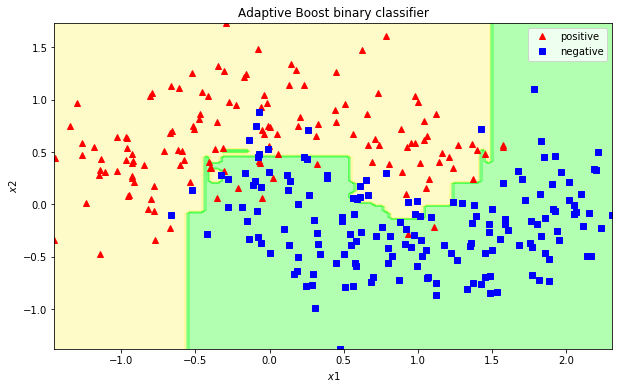

In [13]:
axes = [X_test[:,0].min(), X_test[:,0].max(),
        X_test[:,1].min(), X_test[:,1].max()]

plt.figure(figsize=(10,6))
plt.title('Adaptive Boost binary classifier')
plot_dataset(X_test, y_test)
plot_prediction(ada_clf, axes)
plt.show()